Let's make sure all needed libraries are present:

In [1]:
pip install pandas-profiling pandas numpy matplotlib plotly

Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from datetime import datetime

In [3]:
from ydata_profiling import ProfileReport

Let's load our files:

In [4]:
df_calendar = pd.read_csv('data/calendar.csv.gz')
df_listings = pd.read_csv('data/listings.csv.gz')
df_reviews = pd.read_csv('data/reviews.csv.gz')

Initial explore:

In [5]:
df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,284210,2023-03-14,f,$245.00,$245.00,2.0,66.0
1,10803,2023-03-14,f,$39.00,$39.00,4.0,27.0
2,10803,2023-03-15,f,$39.00,$39.00,4.0,27.0
3,10803,2023-03-16,f,$39.00,$39.00,4.0,27.0
4,10803,2023-03-17,f,$39.00,$39.00,4.0,27.0


In [6]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...
1,10803,3369053,2013-01-18,1763045,Julie,Perfect isnt enough! Lindsay was the best host...
2,10803,3403930,2013-01-23,4423532,Ivonne,Living with Lindsay was very relaxed. The room...
3,10803,3514479,2013-02-11,4551787,Jess,"Beautiful home, great location very friendly a..."
4,10803,3662039,2013-03-01,632036,Yvonne And Pip,It was great staying at Lindsay's apartment. H...


In [7]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,284210,https://www.airbnb.com/rooms/284210,20230313171244,2023-03-14,previous scrape,Fitzroyalty - stylish and central,"In the heart of Fitzroy, immerse yourself in t...",I love Fitzroy because is is walking distance ...,https://a0.muscache.com/pictures/225774e1-bb72...,1480426,...,4.85,4.97,4.61,NaN,f,1,1,0,0,0.31
1,999067,https://www.airbnb.com/rooms/999067,20230313171244,2023-03-14,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,https://a0.muscache.com/pictures/miso/Hosting-...,5491435,...,4.93,4.93,4.82,NaN,f,2,2,0,0,6.11
2,10803,https://www.airbnb.com/rooms/10803,20230313171244,2023-03-14,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,...,4.69,4.65,4.60,NaN,f,1,0,1,0,1.37
3,12936,https://www.airbnb.com/rooms/12936,20230313171244,2023-03-14,previous scrape,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,...,4.83,4.78,4.66,NaN,f,10,10,0,0,0.27
4,289467,https://www.airbnb.com/rooms/289467,20230313171244,2023-03-13,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,https://a0.muscache.com/pictures/3243110/ace5b...,1448773,...,4.50,5.00,4.75,NaN,f,2,2,0,0,0.09


Testing Pandas profiling package:

```python
# Disabled
profile_listings = ProfileReport(df_listings, title="Pandas Profiling Report - Listing dataset")
profile_listings.to_notebook_iframe()
```

We encounter some memory restrictions. Let's try to optimize a bit:

In [8]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20768 non-null  int64  
 1   listing_url                                   20768 non-null  object 
 2   scrape_id                                     20768 non-null  int64  
 3   last_scraped                                  20768 non-null  object 
 4   source                                        20768 non-null  object 
 5   name                                          20766 non-null  object 
 6   description                                   20394 non-null  object 
 7   neighborhood_overview                         12217 non-null  object 
 8   picture_url                                   20768 non-null  object 
 9   host_id                                       20768 non-null 

In [9]:
# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)

In [10]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,284210,https://www.airbnb.com/rooms/284210,20230313171244,2023-03-14,previous scrape,Fitzroyalty - stylish and central,"In the heart of Fitzroy, immerse yourself in t...",I love Fitzroy because is is walking distance ...,https://a0.muscache.com/pictures/225774e1-bb72...,1480426,https://www.airbnb.com/users/show/1480426,Kate,2011-12-07,NaN,I I love travelling and try to go on at least ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/cc269...,https://a0.muscache.com/im/pictures/user/cc269...,Collingwood/Fitzroy,2.0,2.0,"['email', 'phone']",t,t,"Melbourne, Victoria, Australia",Yarra,NaN,-37.79951,144.97948,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Cleaning avail...",$245.00,2,66,2,2,66,66,2.0,66.0,NaN,t,0,0,0,0,2023-03-14,34,0,0,2014-04-21,2020-03-15,4.85,4.91,4.67,4.88,4.85,4.97,4.61,NaN,f,1,1,0,0,0.31
1,999067,https://www.airbnb.com/rooms/999067,20230313171244,2023-03-14,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,https://a0.muscache.com/pictures/miso/Hosting-...,5491435,https://www.airbnb.com/users/show/5491435,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,100%,98%,f,https://a0.muscache.com/im/users/5491435/profi...,https://a0.muscache.com/im/users/5491435/profi...,Richmond,2.0,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,NaN,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",$132.00,2,14,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,12,2023-03-14,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,NaN,f,2,2,0,0,6.11
2,10803,https://www.airbnb.com/rooms/10803,20230313171244,2023-03-14,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,100%,98%,f,https://a0.muscache.com/im/pictures/user/6860c...,https://a0.muscache.com/im/pictures/user/6860c...,Brunswick,1.0,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,NaN,-37.76606,144.97951,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",$39.00,4,27,4,4,27,27,4.0,27.0,NaN,t,0,12,22,112,2023-03-14,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,NaN,f,1,

Candidates for removal based on first sneak peak:

Empty attributes (based on pd.info())
- neighbourhood_group_cleansed
- bathrooms
- calendar_updated
- license

Non-descriptive data
- listing_url
- scrape_id
- last_scraped
- source
- host_url
- host_since (might be good for confidence level use)
- host_about
- host_location (might be used to select preference on local-living hosts?)
- calendar_last_scraped

No text analysis for the time being
- description
- neighborhood_overview
- name
- host_name

Redundand / attributes not used
- picture_url?

High cardinality (difficult to extract relationships)
- name

### Start of initial playground to quickly inspect specific attributes:

In [11]:
df_listings['source'].unique()

array(['previous scrape', 'city scrape'], dtype=object)

In [12]:
df_listings['host_location'].unique()

array([nan, 'Melbourne, Australia', 'Berwick, Australia',
       'Camperdown, Australia', 'Victoria, Australia', 'New York, NY',
       'Frankston, Australia', 'Brighton, Australia',
       'St Kilda, Australia', 'South Kingsville, Australia', 'Australia',
       'Clifton Hill, Australia', 'Ripponlea, Australia',
       'Brunswick, Australia', 'Prahran, Australia',
       'Hawthorn East, Australia', 'Middle Park, Australia',
       'Northcote, Australia', 'South Yarra, Australia',
       'Parkdale, Australia', 'Balwyn North, Australia',
       'Yarraville, Australia', 'Seddon, Australia',
       'Point Cook, Australia', 'Lombardy, Italy', 'Belgrave, Australia',
       'Parkville, Australia', 'Rosanna, Australia',
       'Macclesfield, Australia', 'Badger Creek, Australia',
       'Blackburn South, Australia', 'Perth, Australia',
       'Elwood, Australia', 'Upwey, Australia', 'Cremorne, Australia',
       'Altona, Australia', 'St Kilda West, Australia',
       'Langwarrin South, Austra

In [13]:
df_listings['host_location'].nunique()

935

In [14]:
df_listings['calendar_last_scraped'].unique()

array(['2023-03-14', '2023-03-13', '2023-03-27'], dtype=object)

In [15]:
df_listings['name'].nunique()

20258

In [16]:
df_listings['host_name'].nunique()

5106

In [17]:
df_listings['host_name'].tail(10)

20758     Hamide Sinem
20759             Rima
20760             Iris
20761     Hamide Sinem
20762    Advante Homes
20763          Vanessa
20764         Michelle
20765          Prithvi
20766           Kirsty
20767    Advante Homes
Name: host_name, dtype: object

End of playground

### Initial clean-up

Let's remove the columns listed above:

In [18]:
df_listings = df_listings.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_url', 
                                'host_since', 'host_about', 'host_location', 'calendar_last_scraped', 'description', 'neighborhood_overview', 'picture_url', 'host_thumbnail_url', 'host_picture_url',
                                'name', 'host_name'], 
                                axis=1)

In [19]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20768 non-null  int64  
 1   host_id                                       20768 non-null  int64  
 2   host_response_time                            13639 non-null  object 
 3   host_response_rate                            13639 non-null  object 
 4   host_acceptance_rate                          14403 non-null  object 
 5   host_is_superhost                             20759 non-null  object 
 6   host_neighbourhood                            8587 non-null   object 
 7   host_listings_count                           20766 non-null  float64
 8   host_total_listings_count                     20766 non-null  float64
 9   host_verifications                            20768 non-null 

Let's try Pandas profiling once again:

```python
profile_listings = ProfileReport(df_listings, title="Pandas Profiling Report - Listings dataset")
# profile_listings.to_notebook_iframe()
profile_listings.to_file("data\listings_profiling.html")

Now let's do some intial changes to the data types:

In [20]:
df_listings.head(5)

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,284210,1480426,NaN,NaN,NaN,f,Collingwood/Fitzroy,2.0,2.0,"['email', 'phone']",t,t,"Melbourne, Victoria, Australia",Yarra,-37.79951,144.97948,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Cleaning avail...",$245.00,2,66,2,2,66,66,2.0,66.0,t,0,0,0,0,34,0,0,2014-04-21,2020-03-15,4.85,4.91,4.67,4.88,4.85,4.97,4.61,f,1,1,0,0,0.31
1,999067,5491435,within an hour,100%,98%,f,Richmond,2.0,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",$132.00,2,14,2,2,1125,1125,2.0,1125.0,t,0,0,0,12,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11
2,10803,38901,within a few hours,100%,98%,f,Brunswick,1.0,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",$39.00,4,27,4,4,27,27,4.0,27.0,t,0,12,22,112,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37
3,12936,50121,NaN,NaN,NaN,f,St Kilda,10.0,20.0,"['email', 'phone', 'work_email']",t,t,"St Kilda, Victoria, Australia",Port Phillip,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Microwave"", ""E...",$95.00,3,14,3,3,14,14,3.0,14.0,t,0,0,0,0,42,0,0,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,f,10,10,0,0,0.27
4,289467,1448773,within a few hours,100%,78%,t,NaN,2.0,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",$270.00,2,365,2,2,365,365,2.0,365.0,t,30,60,90,365,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09


### Playground

In [21]:
df_listings['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [22]:
df_listings['host_response_rate'].unique()

array([nan, '100%', '75%', '90%', '67%', '86%', '0%', '71%', '94%', '92%',
       '83%', '50%', '89%', '97%', '91%', '80%', '17%', '95%', '88%',
       '96%', '33%', '76%', '98%', '93%', '99%', '60%', '79%', '78%',
       '20%', '82%', '73%', '69%', '70%', '57%', '72%', '87%', '30%',
       '77%', '65%', '25%', '63%', '53%', '81%', '85%', '74%', '13%',
       '44%', '84%', '40%', '29%', '64%', '11%', '43%', '68%', '23%',
       '10%', '56%', '58%'], dtype=object)

In [23]:
df_listings['host_is_superhost'].value_counts()

f    15973
t     4786
Name: host_is_superhost, dtype: int64

In [24]:
df_listings['property_type'].value_counts()

Entire rental unit                8518
Entire home                       3123
Private room in home              2442
Private room in rental unit       1591
Entire condo                       848
                                  ... 
Train                                1
Private room in chalet               1
Tipi                                 1
Floor                                1
Private room in cycladic house       1
Name: property_type, Length: 86, dtype: int64

In [25]:
df_listings['room_type'].value_counts()

Entire home/apt    15074
Private room        5376
Shared room          247
Hotel room            71
Name: room_type, dtype: int64

In [26]:
df_listings[['minimum_nights', 'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm']].notna().agg('count')

minimum_nights            20768
minimum_minimum_nights    20768
minimum_nights_avg_ntm    20768
maximum_nights            20768
maximum_minimum_nights    20768
maximum_nights_avg_ntm    20768
dtype: int64

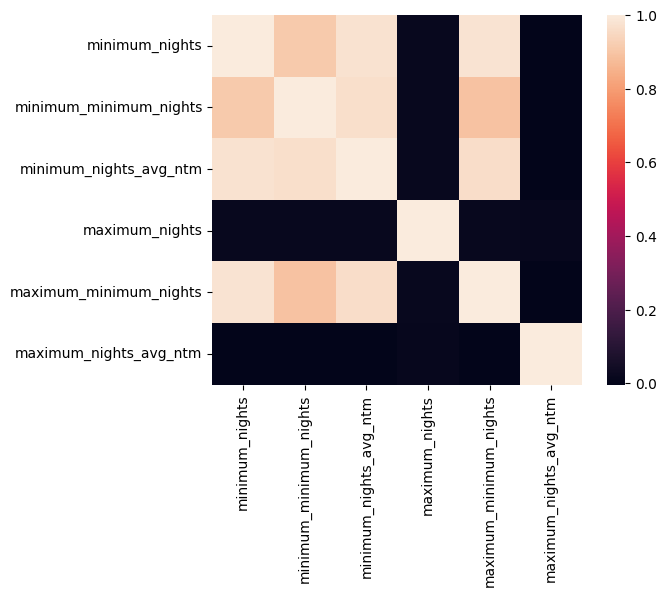

In [27]:
#correlation matrix
corrmat = df_listings[['minimum_nights', 'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm']].corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, 
            # vmax=.8, 
            square=True);

`minimum_nights`, `minimum_minimum_nights`, `minimum_nights_avg_ntm` and `maximum_minimum_nights` are highly correlated, so let's stick with minimum_nights for simplicity

In [28]:
df_listings[['maximum_nights', 'maximum_nights_avg_ntm']]

,maximum_nights,maximum_nights_avg_ntm
0,66,66.0
1,14,1125.0
2,27,27.0
3,14,14.0
4,365,365.0
...,...,...
20763,14,14.0
20764,365,1125.0
20765,365,365.0
20766,14,1125.0


It appears there's something going on because of datatypes. Let's try to fix that up:

In [29]:
corrmat = df_listings[['maximum_nights', 'maximum_nights_avg_ntm']].astype('int').corr()

fig = px.imshow(corrmat, 
            text_auto=True
            );
fig.show()

Not what I was expecting. Let's try a scatterplot

In [30]:
px.scatter(df_listings[['maximum_nights', 'maximum_nights_avg_ntm']].astype('int'),
           x='maximum_nights',
           y='maximum_nights_avg_ntm')

Might be a direct result of outliers?

In [31]:
df_max_nights = df_listings[['maximum_nights', 'maximum_nights_avg_ntm']]\
                    .astype('int')
df_max_nights = df_max_nights[(df_max_nights['maximum_nights'] < 10000) & (df_max_nights['maximum_nights_avg_ntm'] < 10000)]

px.scatter(df_max_nights,
           x='maximum_nights',
           y='maximum_nights_avg_ntm')

In [32]:
df_listings[df_listings['maximum_nights_avg_ntm'] == 1125].shape[0] / df_listings.shape[0]

0.5501251926040062

`maximum_nights_avg_ntm` seems pretty extreme and more than half has a "capped" value of 1125. Doesn't seem reliable. Will skip it for now...

Now **Reviews attributes:**

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
reviews_per_month


In [33]:
corrmat = df_listings[['number_of_reviews',\
                        'number_of_reviews_ltm',\
                        'number_of_reviews_l30d',\
                        'reviews_per_month']].corr()

fig = px.imshow(corrmat.round(2), 
            text_auto=True
            );
fig.show()

`number_of_reviews_ltm` and `number_of_reviews_l30d` are highly corr. with `reviews_per_month`. Removing...

In [34]:
df_listings['instant_bookable'].value_counts()

f    15222
t     5546
Name: instant_bookable, dtype: int64

Finally, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms

In [35]:
corrmat = df_listings[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']].corr()

fig = px.imshow(corrmat.round(2), 
            text_auto=True
            );
fig.show()

`calculated_host_listings_count_entire_homes`, `calculated_host_listings_count_private_rooms` are highly corr. with `calculated_host_listings_count`. Removing...

In [36]:
df_listings['calculated_host_listings_count_shared_rooms'].describe()

count    20768.000000
mean         0.060478
std          0.636071
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: calculated_host_listings_count_shared_rooms, dtype: float64

In [37]:
px.histogram(df_listings['calculated_host_listings_count_shared_rooms'])

In [38]:
(df_listings['calculated_host_listings_count_shared_rooms'] > 0).sum()

471

`calculated_host_listings_count_shared_rooms`: Only 457 records are non-zero. Dropping for lack of meaning.

### candidates to change:
Categorical:
- host_response_time
- host_acceptance_rate
- host_is_superhost
- room_type

Clean up and float conversion:
- host_response_rate
- price

Date conversion:
- first_review
- last_review

Boolean:
- instant_bookable

Further deletions
- host_verifications (no value knowing how it was verified, just that they are i.e. `host_identity_verified`)
- host_listings_count and host_total_listings_count?? (highly correlated too)
- host_neighbourhood
- host_has_profile_pic
- property type (will rely on `room type` as cardinality is lower and more meaningful)
- Amenities (too much info., high cardinality. Might be worthy to do a text analysis on what are the most important/relevant/impactful ones)
- minimum_minimum_nights (highly corr. with `min nights`)
- minimum_nights_avg_ntm (idem)
- maximum_minimum_nights (idem)
- maximum_nights_avg_ntm (special case)
- has_availability, availability_30, availability_60, availability_90, availability_365 (won't serve much for our purpose of setting best rent value or chances for rent a place)
- number_of_reviews_ltm and number_of_reviews_l30d (highly corr. with `reviews_per_month`)
- calculated_host_listings_count_entire_homes and calculated_host_listings_count_private_rooms (highly corr. with `calculated_host_listings_count`)
- calculated_host_listings_count_shared_rooms

Bulk deletion:

In [39]:
df_listings = df_listings.drop(['host_verifications', 'host_listings_count', 'host_total_listings_count', 'host_neighbourhood', 'host_has_profile_pic', 'property_type', 'amenities', 'minimum_minimum_nights',
                   'minimum_nights_avg_ntm', 'maximum_minimum_nights', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                   'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'],
                   axis = 1)

Type conversion:

In [40]:
df_listings = df_listings.astype({
    'instant_bookable': 'bool',
    'host_response_time': 'category', 
    'host_acceptance_rate': 'category', 
    'host_is_superhost': 'category', 
    'room_type': 'category',
    'first_review': 'datetime64[D]',
    'last_review': 'datetime64[D]'
})

In [41]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           20768 non-null  int64         
 1   host_id                                      20768 non-null  int64         
 2   host_response_time                           13639 non-null  category      
 3   host_response_rate                           13639 non-null  object        
 4   host_acceptance_rate                         14403 non-null  category      
 5   host_is_superhost                            20759 non-null  category      
 6   host_identity_verified                       20766 non-null  object        
 7   neighbourhood                                12218 non-null  object        
 8   neighbourhood_cleansed                       20768 non-null  object        


Special case `bathroom_text`. Since bathroom is arguably important to have, I propose to keep it and clean up following the next rules:
- split in two atributes
- Filter out shared/private. If missing, default to private
- Replace `half` for 0.5
- Another attribute will extract the number

In [42]:
df_listings['bathrooms_text'].value_counts()

1 bath               9959
2 baths              3727
1 shared bath        2277
1 private bath       1341
1.5 baths             962
2.5 baths             809
1.5 shared baths      467
3 baths               346
2 shared baths        204
3.5 baths             199
2.5 shared baths       79
4 shared baths         61
4 baths                47
0 shared baths         38
3 shared baths         33
4.5 baths              31
Shared half-bath       27
Private half-bath      24
0 baths                21
3.5 shared baths       19
Half-bath              17
7.5 shared baths       12
5 baths                 9
5.5 shared baths        9
5.5 baths               9
5 shared baths          8
8.5 shared baths        5
6 baths                 4
10 baths                2
6.5 baths               2
9.5 baths               2
7 baths                 1
8.5 baths               1
9 baths                 1
6 shared baths          1
7.5 baths               1
Name: bathrooms_text, dtype: int64

In [43]:
df_listings['bathrooms_type'] = df_listings['bathrooms_text'].str.lower().str.extract('(shared|private)')
df_listings['bathrooms_qty'] = df_listings['bathrooms_text'].str.lower().str.replace('half', '0.5').str.extract('([0-9]*\.?[0-9]*)')

In [44]:
df_listings[['bathrooms_type', 'bathrooms_qty', 'bathrooms_text']]

,bathrooms_type,bathrooms_qty,bathrooms_text
0,NaN,1,1 bath
1,NaN,1,1 bath
2,shared,1,1 shared bath
3,NaN,1,1 bath
4,NaN,2.5,2.5 baths
...,...,...,...
20763,NaN,1,1 bath
20764,NaN,1,1 bath
20765,private,1,1 private bath
20766,NaN,1,1 bath


In [45]:
df_listings['bathrooms_qty'].isna().sum()

13

In [46]:
df_listings['bathrooms_type'].value_counts()

shared     3240
private    1365
Name: bathrooms_type, dtype: int64

In [47]:
df_listings['bathrooms_type'].isna().sum()

16163

Since missing type is too high. We are passing the impute exercise for now.

In [49]:
df_listings = df_listings.drop(['bathrooms_text'], axis=1)

In [50]:
df_listings

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_type,bathrooms_qty
0,284210,1480426,NaN,NaN,NaN,f,t,"Melbourne, Victoria, Australia",Yarra,-37.799510,144.979480,Entire home/apt,2,1.0,1.0,$245.00,2,66,66,66,34,2014-04-21,2020-03-15,4.85,4.91,4.67,4.88,4.85,4.97,4.61,True,1,0,0.31,NaN,1
1,999067,5491435,within an hour,100%,98%,f,t,"Richmond, Victoria, Australia",Yarra,-37.820300,144.990160,Entire home/apt,2,1.0,1.0,$132.00,2,14,1125,1125,741,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,True,2,0,6.11,NaN,1
2,10803,38901,within a few hours,100%,98%,f,t,"Brunswick East, Victoria, Australia",Moreland,-37.766060,144.979510,Private room,2,1.0,1.0,$39.00,4,27,27,27,169,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,True,1,0,1.37,shared,1
3,12936,50121,NaN,NaN,NaN,f,t,"St Kilda, Victoria, Australia",Port Phillip,-37.859990,144.976620,Entire home/apt,2,1.0,1.0,$95.00,3,14,14,14,42,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,True,10,0,0.27,NaN,1
4,289467,1448773,within a few hours,100%,78%,t,t,NaN,Yarra Ranges,-37.905460,145.394470,Entire home/apt,4,2.0,4.0,$270.00,2,365,365,365,8,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,True,2,0,0.09,NaN,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20763,845149773793858669,62023858,NaN,NaN,NaN,f,t,"Prahran East, Victoria, Australia",Port Phillip,-37.860111,145.003583,Entire home/apt,2,1.0,1.0,$96.00,2,14,14,14,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,0,NaN,NaN,1
20764,845151768946987710,23082566,within an hour,100%,93%,t,t,"St Kilda, Victoria, Australia",Port Phillip,-37.864430,144.988750,Entire home/apt,2,1.0,1.0,$90.00,5,365,1125,1125,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4,0,NaN,NaN,1
20765,845188876303513005,268483300,NaN,NaN,NaN,f,t,NaN,Melbourne,-37.784396,144.940760,Private room,2,1.0,1.0,$55.00,1,365,365,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,0,NaN,private,1
20766,845197917966633672,504961936,NaN,NaN,NaN,f,f,"St Kilda, Victoria, Australia",Port Phillip,-37.859512,144.978695,Entire home/apt,2,1.0,1.0,$700.00,4,14,1125,1125,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,0,NaN,NaN,1


Let's finish with float conversion: 
- host_response_rate 
- price

In [56]:
df_listings['host_response_rate'].isna().sum() / df_listings.shape[0]

0.3432684899845917

34% is missing so it seems sensible to keep it

In [58]:
df_listings['host_response_rate'].value_counts()

100%    10484
94%       445
98%       301
99%       290
0%        288
90%       269
80%       169
97%       158
50%       100
96%        93
95%        81
93%        79
91%        75
67%        67
92%        65
75%        52
83%        51
60%        51
81%        47
76%        45
88%        42
70%        40
89%        35
77%        26
86%        25
71%        24
79%        21
33%        19
78%        19
82%        15
20%        15
13%        14
85%        13
84%        12
72%        12
73%        11
40%        10
87%        10
23%        10
64%         9
63%         6
57%         6
68%         5
17%         4
69%         4
10%         3
30%         3
43%         3
74%         2
29%         2
44%         2
25%         2
11%         1
53%         1
65%         1
56%         1
58%         1
Name: host_response_rate, dtype: int64

It doesn't have weird characters so simple '%'' removal should do the trick:

In [68]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace('%', '').astype('float') / 100

Now with `price`:

In [ ]:
df_listings['price'].isna().sum()

0

No nulls present

In [78]:
df_listings['price'].unique()

array(['$245.00', '$132.00', '$39.00', '$95.00', '$270.00', '$1,000.00',
       '$116.00', '$65.00', '$120.00', '$174.00', '$47.00', '$225.00',
       '$40.00', '$400.00', '$89.00', '$88.00', '$85.00', '$170.00',
       '$336.00', '$125.00', '$86.00', '$99.00', '$349.00', '$149.00',
       '$329.00', '$94.00', '$50.00', '$164.00', '$111.00', '$359.00',
       '$180.00', '$100.00', '$79.00', '$567.00', '$90.00', '$70.00',
       '$201.00', '$105.00', '$350.00', '$291.00', '$122.00', '$97.00',
       '$84.00', '$240.00', '$295.00', '$494.00', '$150.00', '$110.00',
       '$200.00', '$190.00', '$633.00', '$300.00', '$135.00', '$363.00',
       '$114.00', '$45.00', '$160.00', '$470.00', '$80.00', '$158.00',
       '$220.00', '$701.00', '$71.00', '$364.00', '$35.00', '$268.00',
       '$410.00', '$67.00', '$476.00', '$49.00', '$106.00', '$433.00',
       '$261.00', '$564.00', '$209.00', '$467.00', '$522.00', '$121.00',
       '$206.00', '$250.00', '$55.00', '$750.00', '$81.00', '$857.00',
 

Let's remove '$' and ',' character. For type conversion, it seems we don's have value cents. Moreover, not something we can care so will round to nearest dollar and convert int:

In [86]:
df_listings['price'] = df_listings['price'].str.replace(r'[$,]', '', regex=True)\
                        .astype('float')\
                        .round()\
                        .astype('int')

In [88]:
df_listings.to_csv('data/listings_clean.csv')

## Reviews & Calendar dataset:

In [51]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...
1,10803,3369053,2013-01-18,1763045,Julie,Perfect isnt enough! Lindsay was the best host...
2,10803,3403930,2013-01-23,4423532,Ivonne,Living with Lindsay was very relaxed. The room...
3,10803,3514479,2013-02-11,4551787,Jess,"Beautiful home, great location very friendly a..."
4,10803,3662039,2013-03-01,632036,Yvonne And Pip,It was great staying at Lindsay's apartment. H...


In [71]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,284210,2023-03-14,f,$245.00,$245.00,2.0,66.0
1,10803,2023-03-14,f,$39.00,$39.00,4.0,27.0
2,10803,2023-03-15,f,$39.00,$39.00,4.0,27.0
3,10803,2023-03-16,f,$39.00,$39.00,4.0,27.0
4,10803,2023-03-17,f,$39.00,$39.00,4.0,27.0


It seems both datasets are not relevant for our current initiative of modeling best renting price. Hence, will be drop it for now.